In [1]:
import numpy as np

from ABC_sensitivity import create_output_dir, log_sample, solve_odes, sensitivity_analysis
from ABC_sensitivity import save_params, save_ode_outputs, save_problem
from ABC_sensitivity import load_data, load_params, load_ode_outputs, load_problem
from ABC_sensitivity import plot_param_values, plot_ode_outputs, plot_sensitivity_grid

%load_ext autoreload
%autoreload 2

In [2]:
# Define output directory
output_dir = 'Experiments/ABC/0'
create_output_dir(output_dir)

Directory 'Experiments/ABC/0' created.


#### Define ODE Model

In [3]:
# Define parameter ranges
ode_problem = {
    'num_vars': 2,
    'names': ['k1', 'k2'],
    'bounds': [[0.1, 50], [0.1, 50]]
}
save_problem(ode_problem, output_dir)

#### Sample parameters

In [4]:
param_values = log_sample(ode_problem, 1000)
print('Parameter values shape:', param_values.shape)

Parameter values shape: (6000, 2)


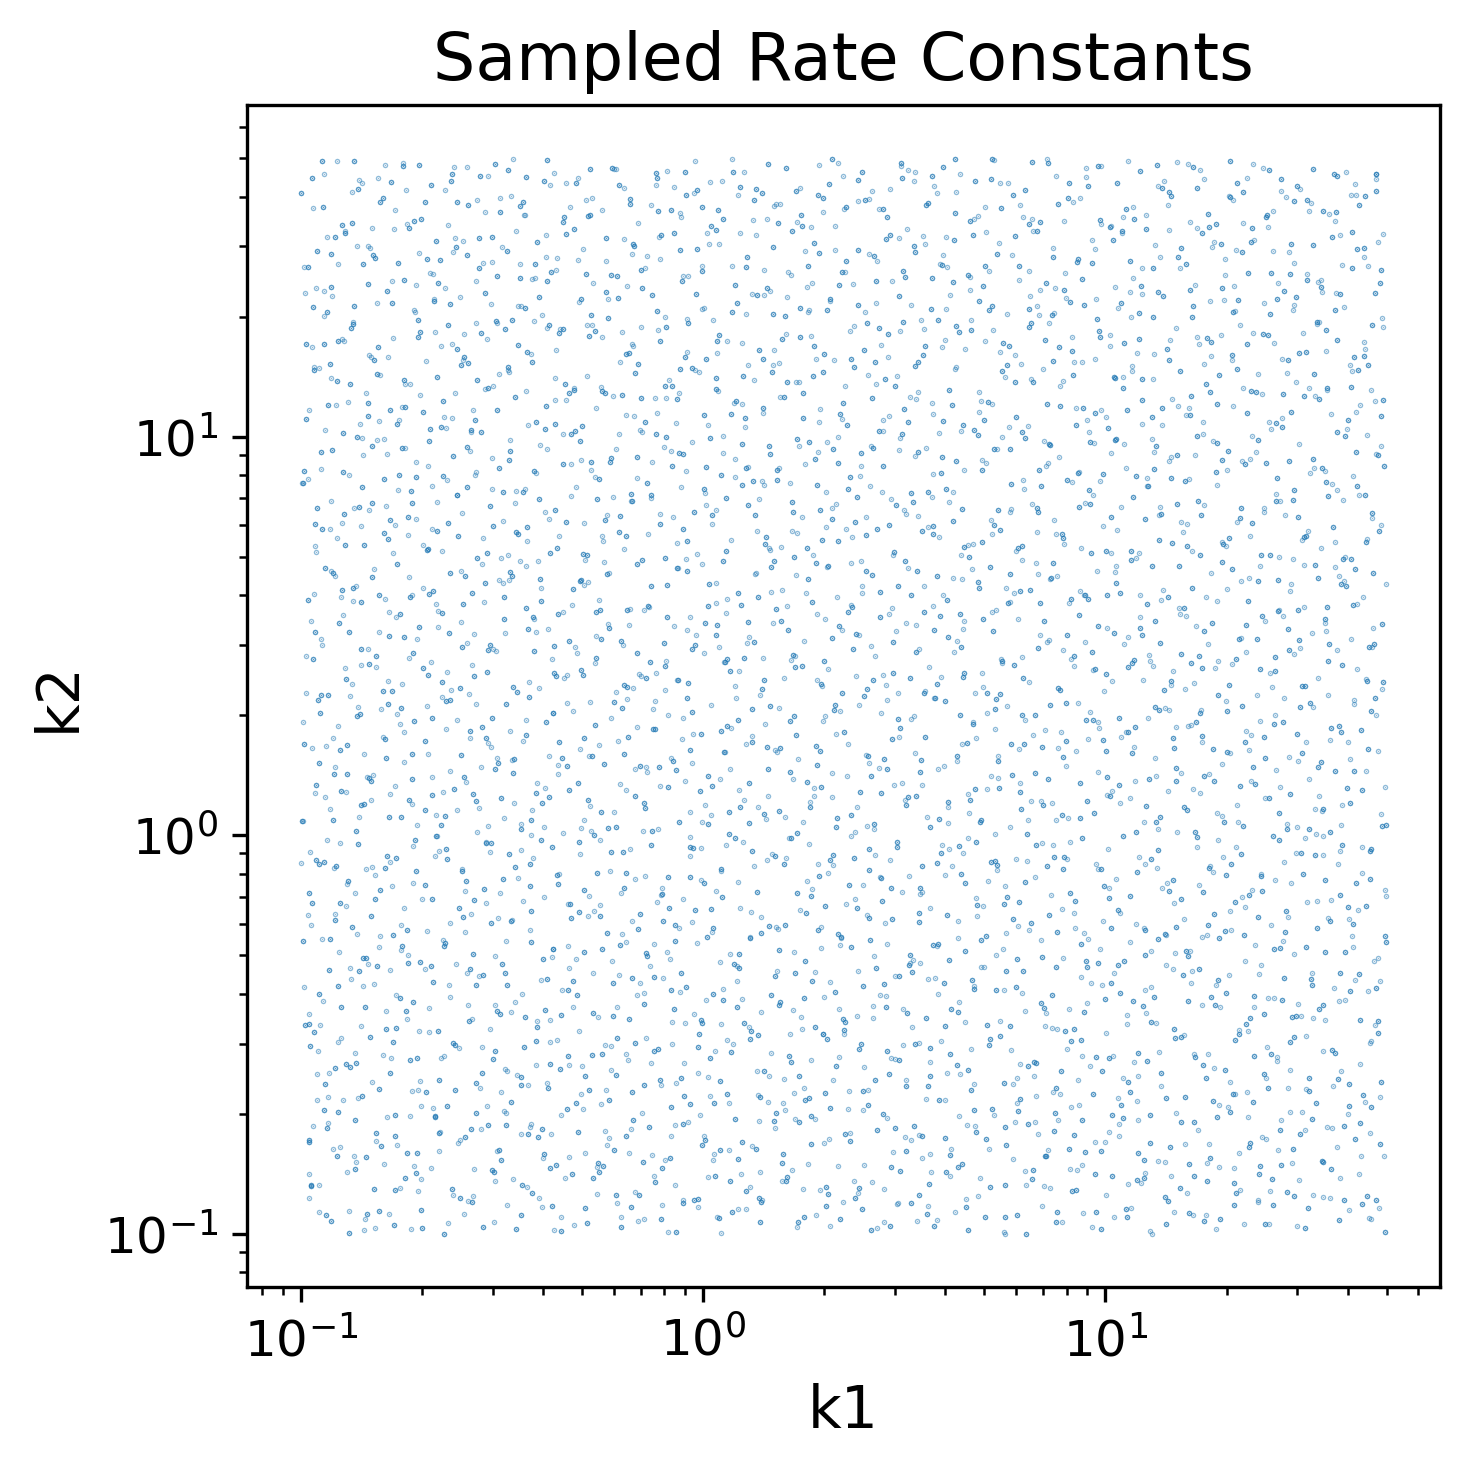

In [5]:
fig, ax = plot_param_values(param_values, 0, 1, names=ode_problem['names'])

In [6]:
save_params(param_values, output_dir)

#### Solve ODE Model for all parameters

In [7]:
t, output_mat, output_names = solve_odes(param_values, time_points=20, y0=[10, 0, 0], tmax=10)
print('ODE outputs:', output_names)
print('Output matrix shape:', output_mat.shape)

ODE outputs: ['A', 'B', 'C']
Output matrix shape: (6000, 20, 3)


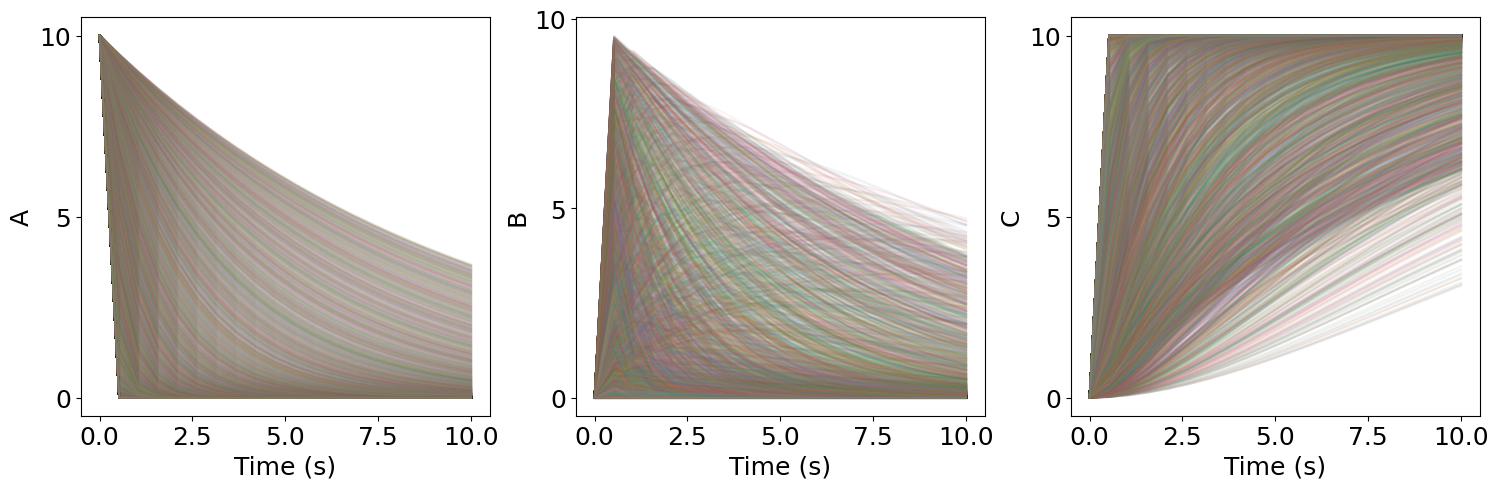

In [8]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

In [9]:
save_ode_outputs(output_mat, t, output_dir)

#### Perform sensitivity analysis

In [10]:
dfs = sensitivity_analysis(ode_problem, t, output_mat, output_dir=output_dir)

Performing sensitivity analysis on output 0 ...


20it [00:00, 97.24it/s]


Performing sensitivity analysis on output 1 ...


20it [00:00, 104.39it/s]


Performing sensitivity analysis on output 2 ...


20it [00:00, 107.91it/s]


3
['k1_ST', 'k2_ST']


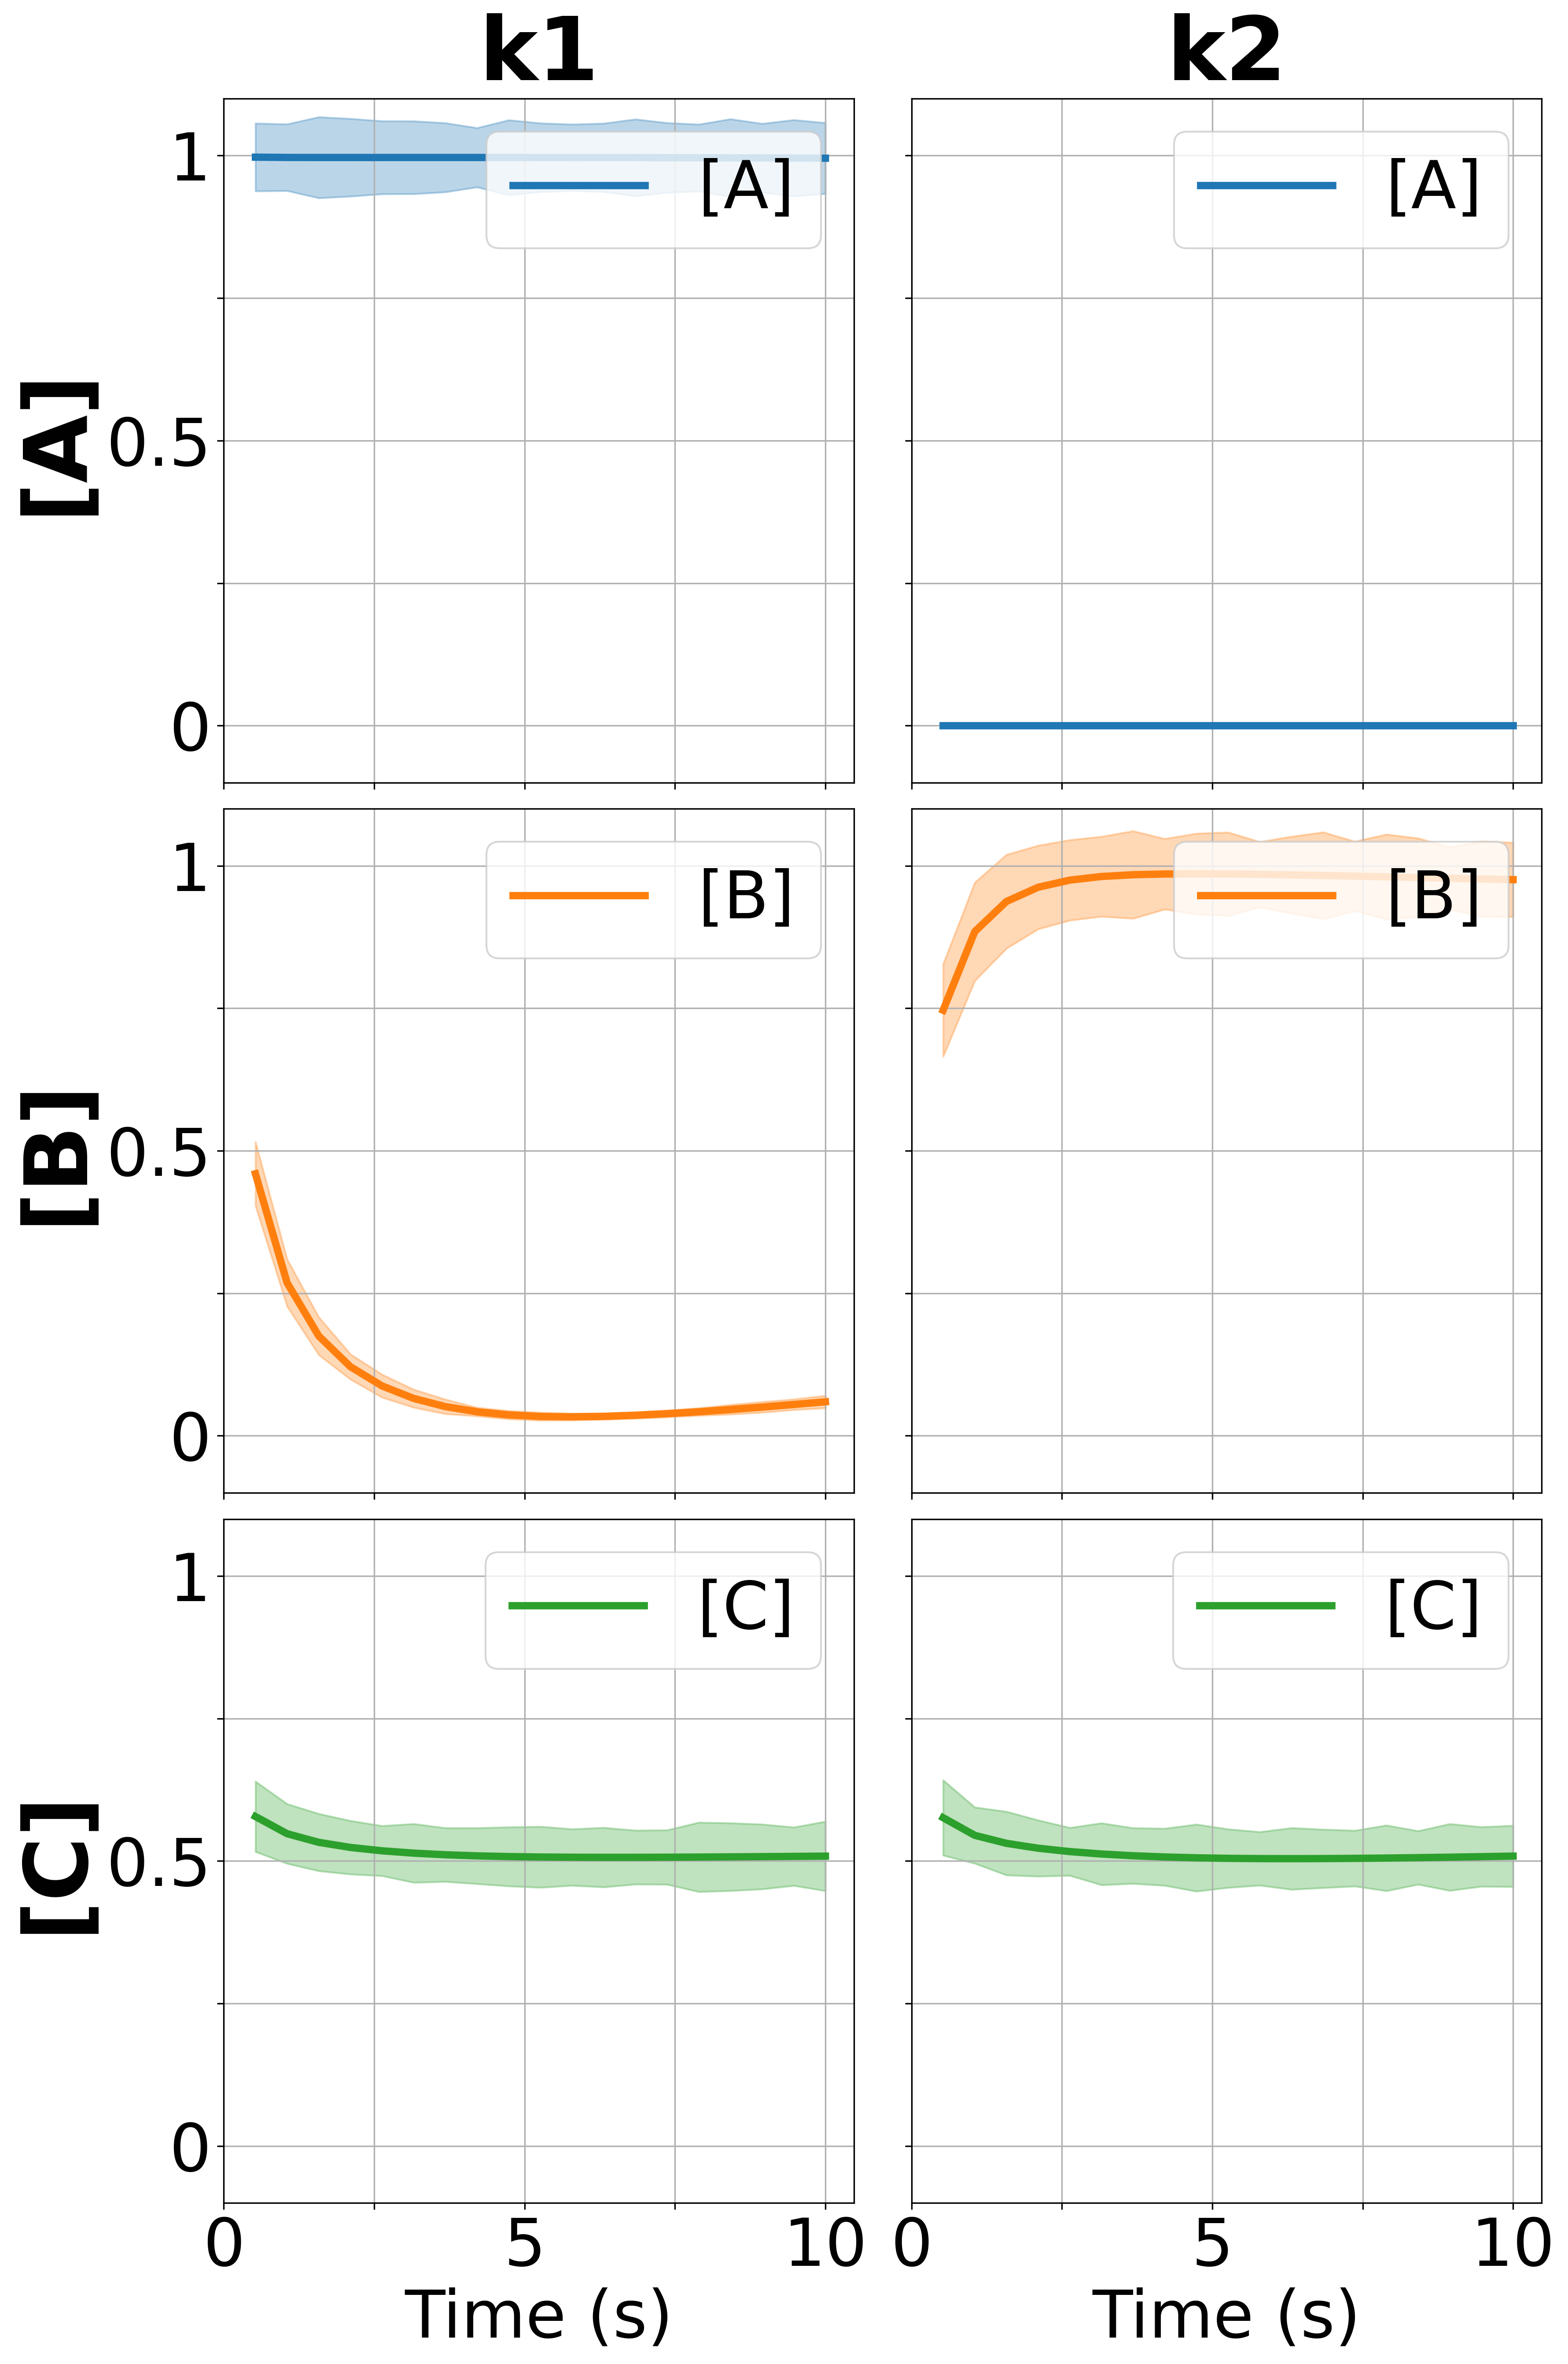

In [11]:
fig, axs = plot_sensitivity_grid(ode_problem, dfs)

#### Load and plot data

In [12]:
input_dir = output_dir

problem = load_problem(input_dir)
param_values = load_params(input_dir)
t, output_mat = load_ode_outputs(input_dir)
dfs = load_data(input_dir)

problem

{'num_vars': 2, 'names': ['k1', 'k2'], 'bounds': [[0.1, 50], [0.1, 50]]}

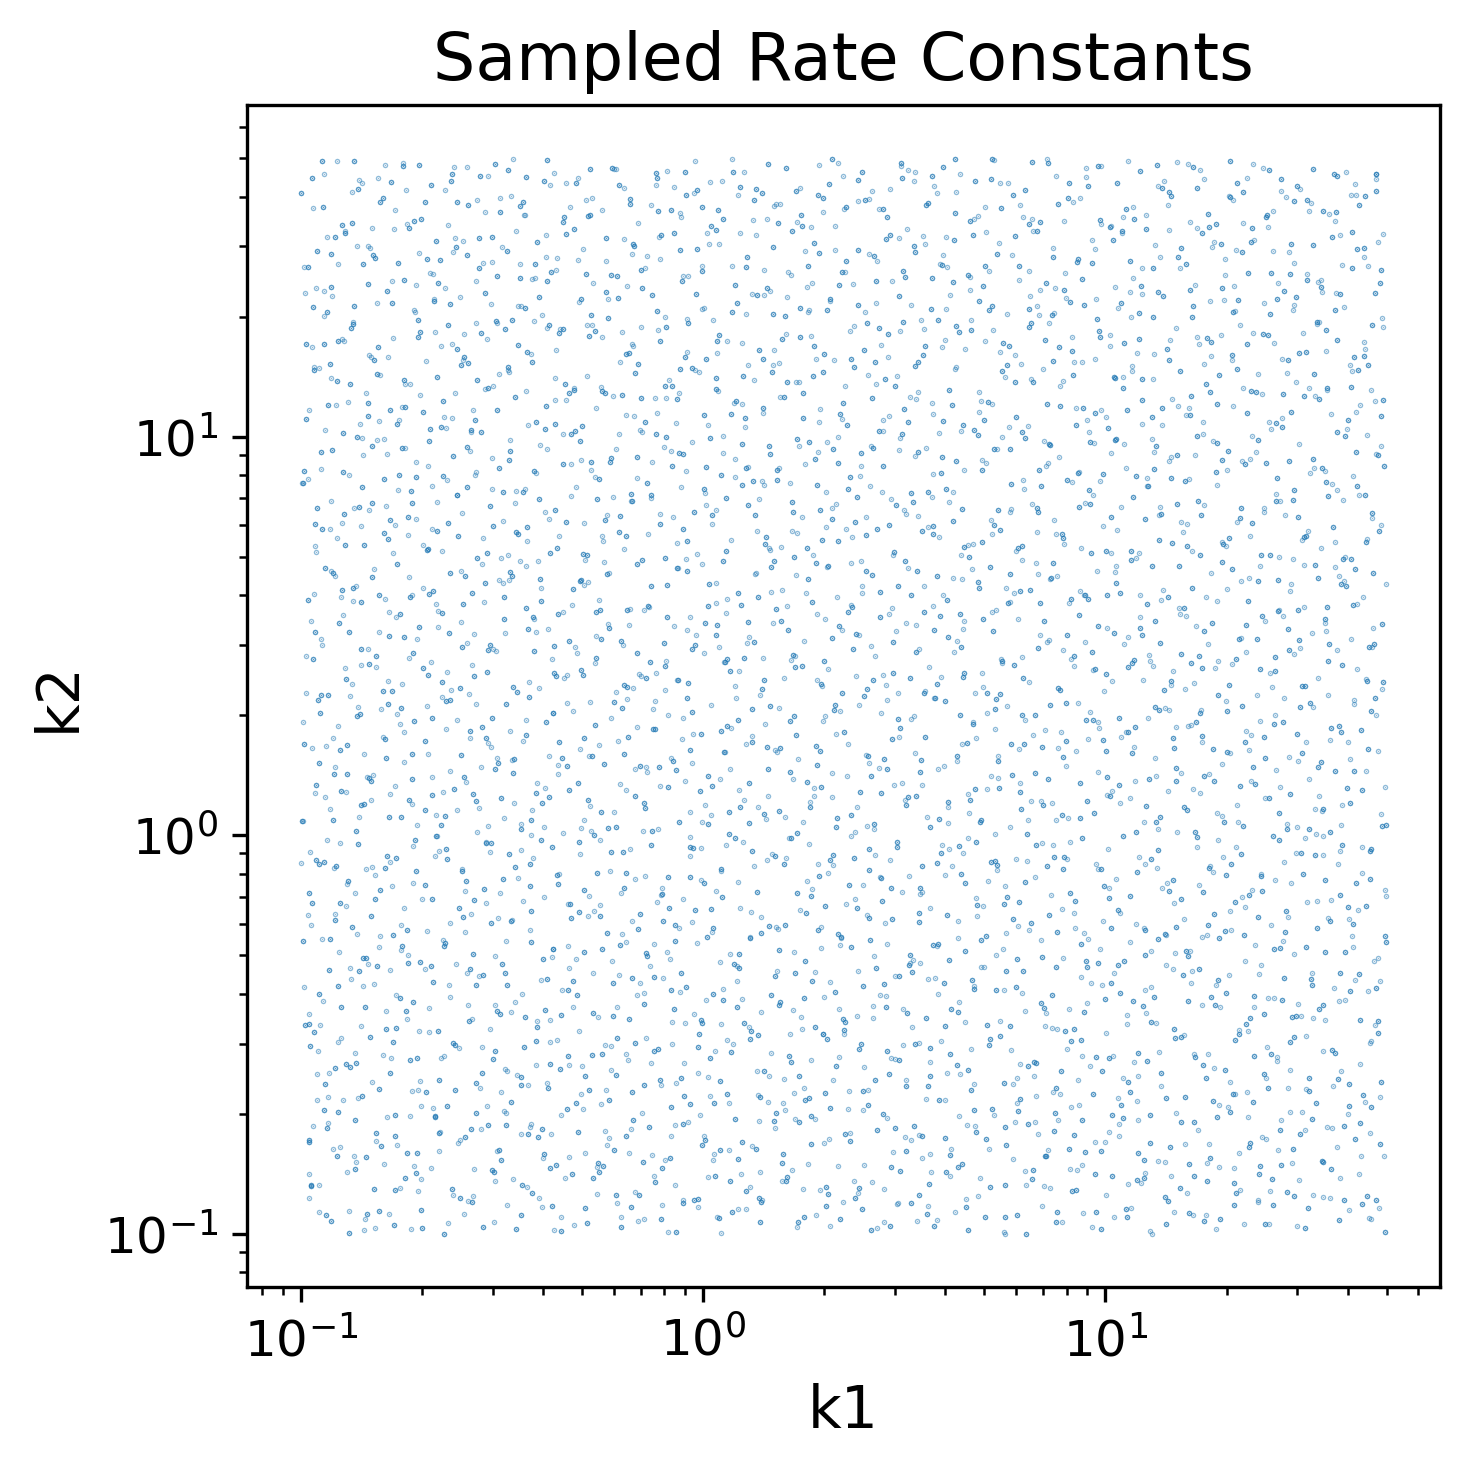

In [13]:
fig, ax = plot_param_values(param_values, idx1=0, idx2=1, names=problem['names'])

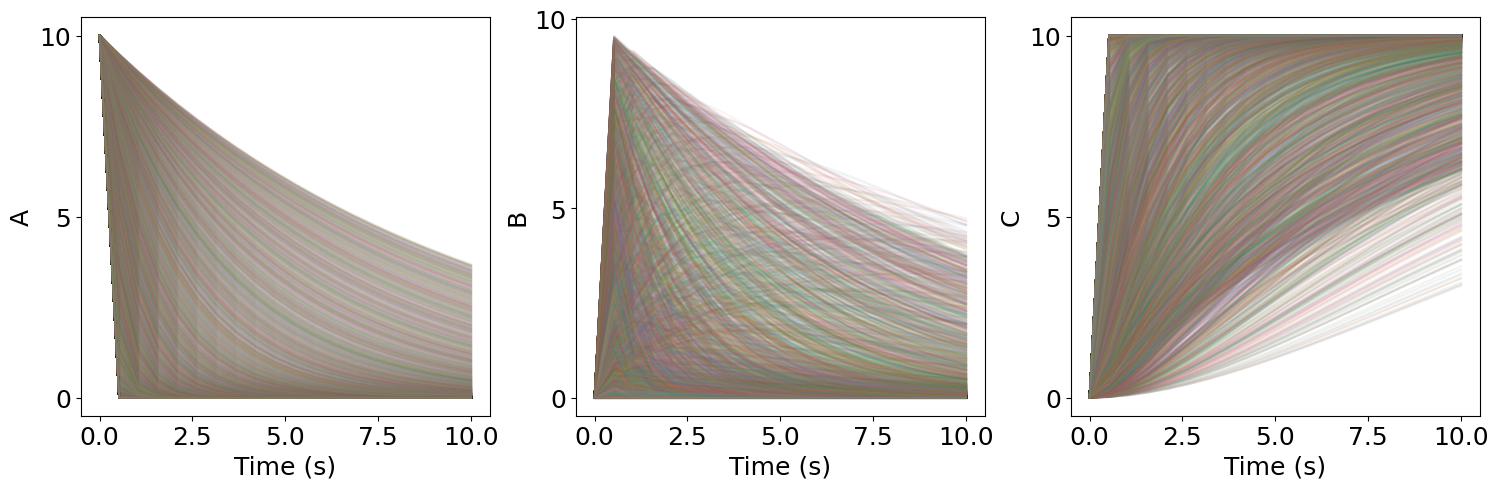

In [14]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

3
['k1_ST', 'k2_ST']


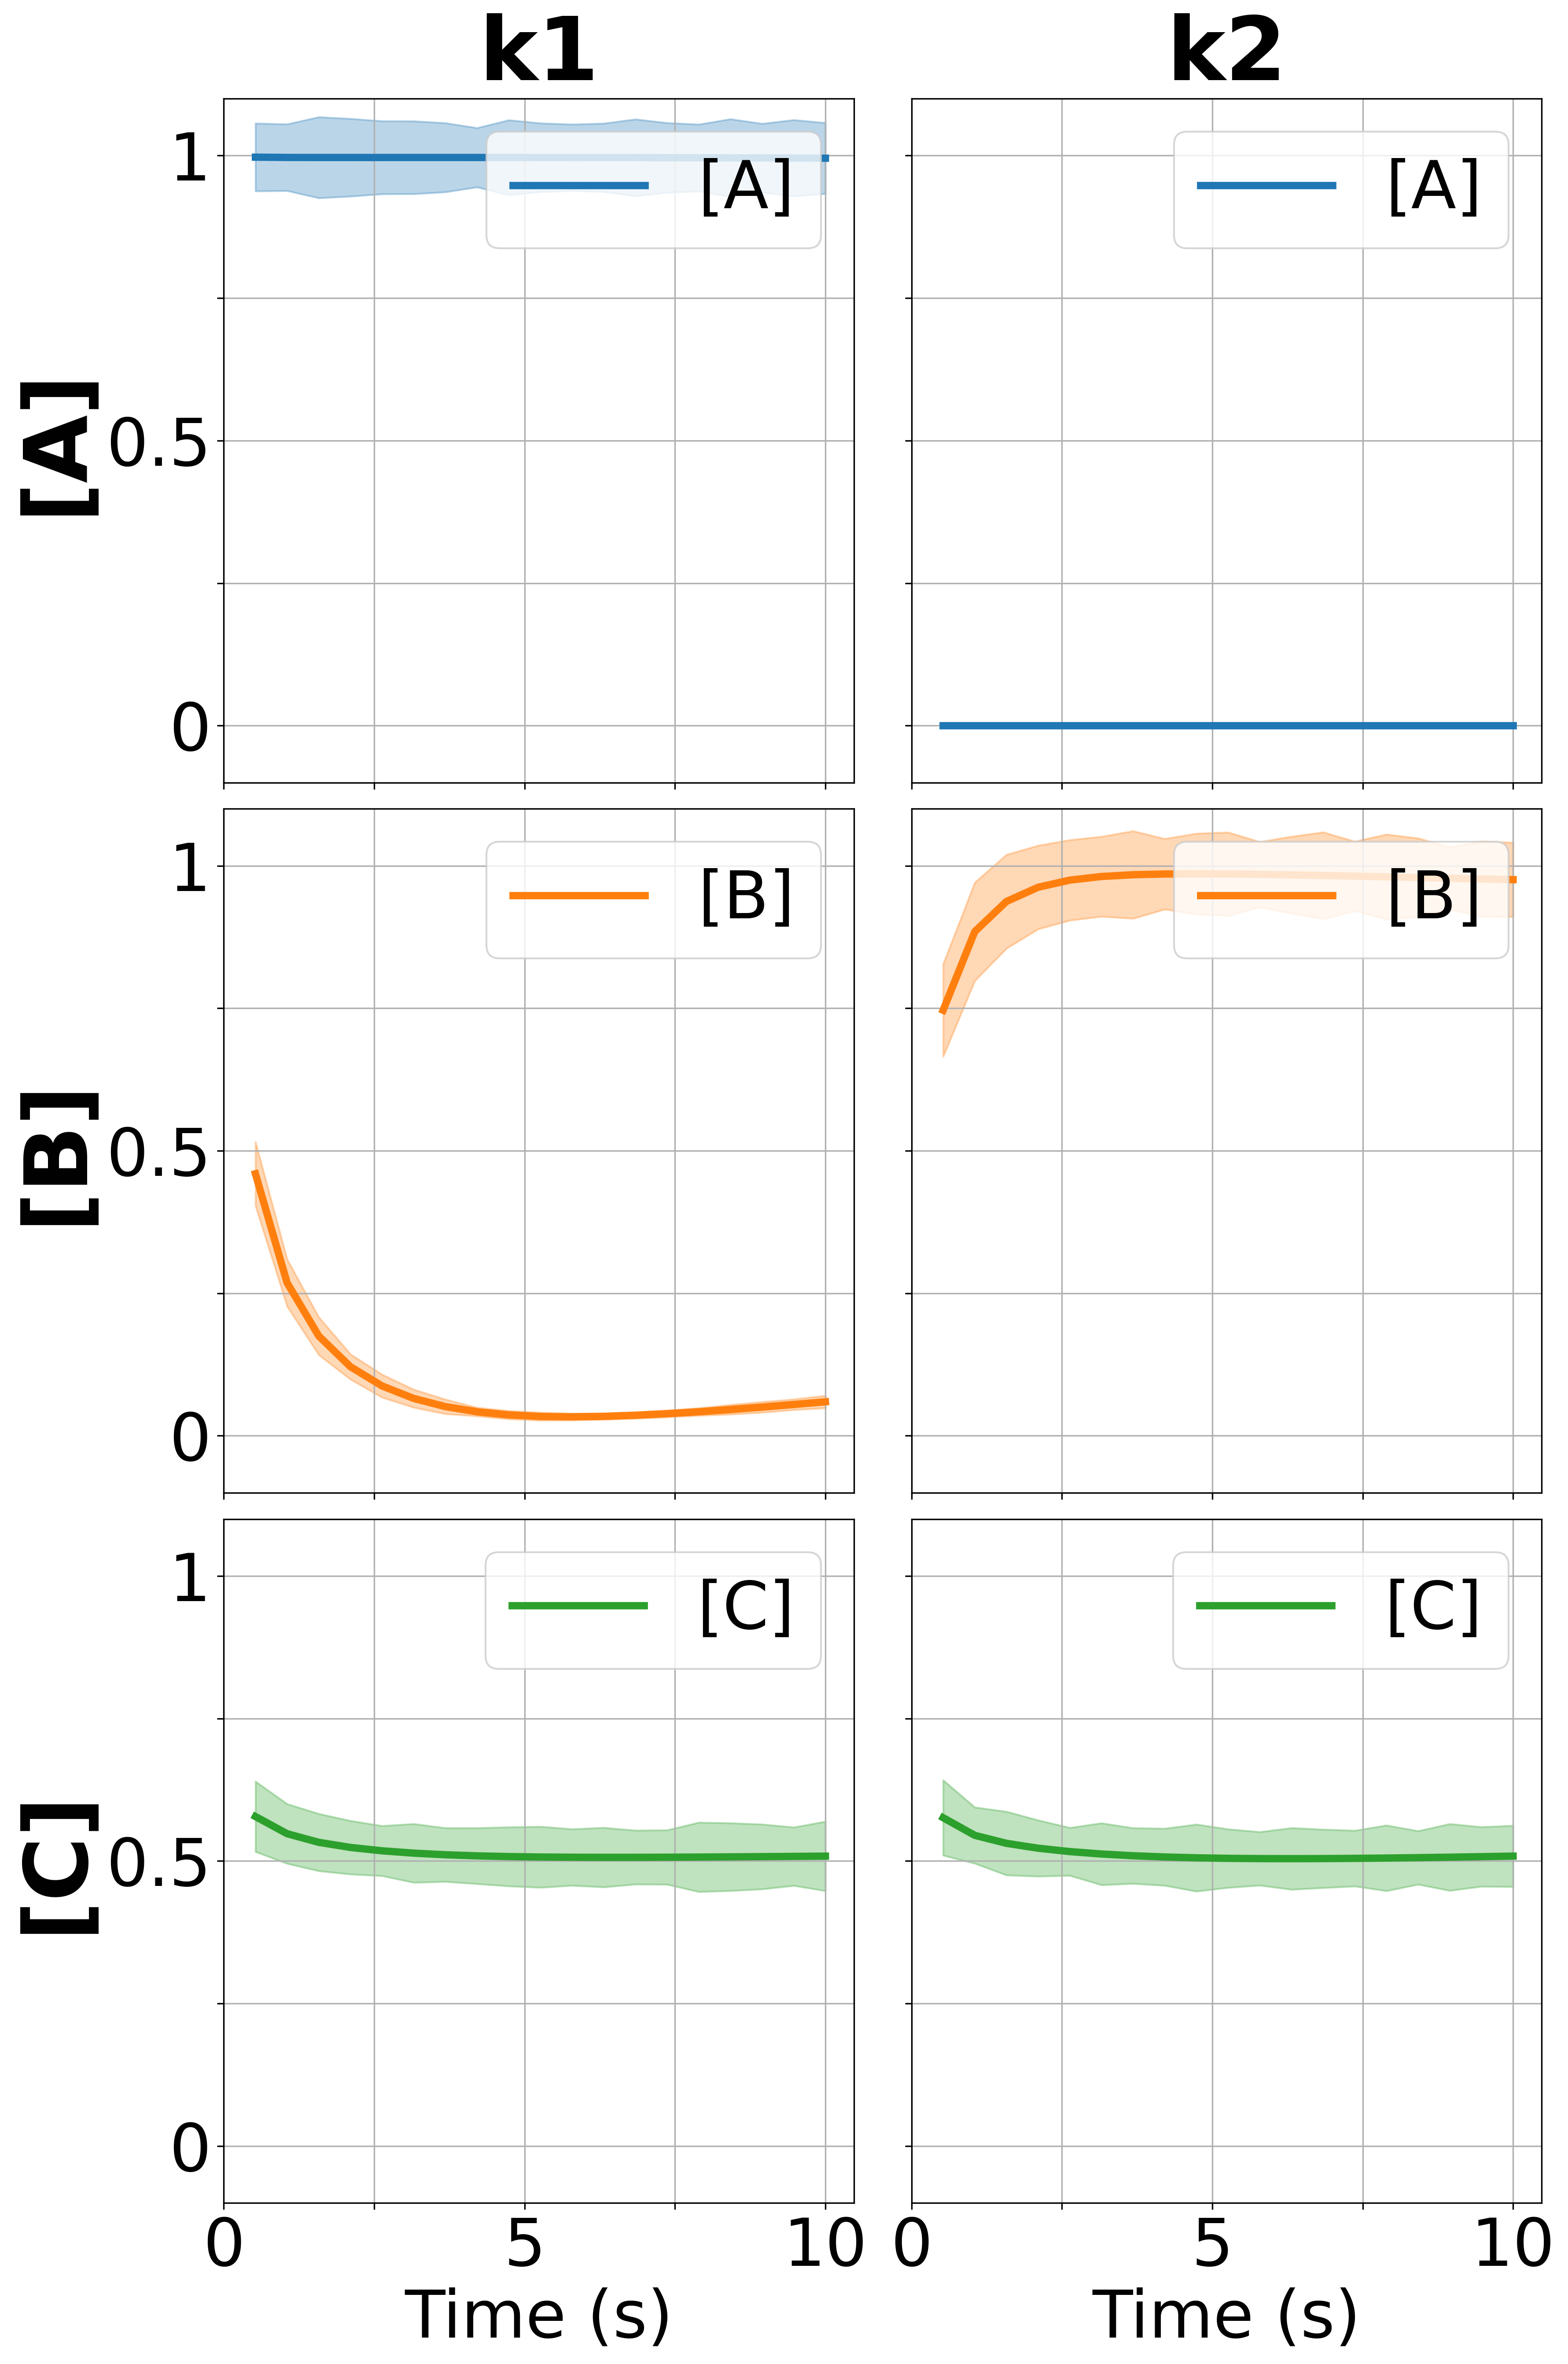

In [15]:
fig, axs = plot_sensitivity_grid(problem, dfs)